# Event-related fields

Event-related fields (ERFs) as well as event-related potentials are generated by neuronal activity elicited by a given events. They are often used in cognitive and clinical neurosciene to quantify the brain activity associated with a given task (*Luck 2014, Woodman 2010*). The aim of this section is to generate event-related fields (ERFs) in response to the visual input and to do some simple plotting of time course and topographies. Event-related fields are generated by neuronal activity phase-locked to a given event.
Preparation

## Preparation
Import the relevant modules

In [1]:
import os.path as op
import os
import mne
from mne_bids import BIDSPath, read_raw_bids 
from mne.viz import plot_evoked_topo
import matplotlib.pyplot as plt
import numpy as np


File overview

The chapter relies on the input file (embedded in the BIDS structure):

< BIDS_ROOT >/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif

#### Set the local paths of the data:


In [2]:
subject = '01'
session = '01'
task = 'SpAtt'  
run = '01'  
meg_suffix = 'meg'
epo_suffix = 'epo'

#data_path='C:/Users/rakshita/Documents/Cerca_raw_files'
data_path = '/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif'

bids_root = op.join(data_path, "Cerca_Spatt_BIDS")
deriv_root = op.join(bids_root, "derivatives/analysis")
bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='.fif', check=False)
print(bids_path.basename,bids_path.fpath)

sub-01_ses-01_task-SpAtt_run-01_epo.fif /Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif


## Read the epochs

To read in the epochs identified in the previous chapter write

In [3]:
epochs = mne.read_epochs(bids_path.fpath,
                         proj = False,
                         preload=True,
                         verbose=False)

In [4]:
epochs

<EpochsFIF | 219 events (all good), -0.749 – 2 s (baseline off), ~719.1 MiB, data loaded,
 'cue_Left': 113
 'cue_Right': 106>

## Averaging the trial data

Identify the epochs for the condition with respect to the onset of the left and right cue onset, and then average over trials. Subsequently, apply a bandpass filter at 0.1-30 Hz and crop the data to the time interval from -0.1 to 0.4 s from stimulus onset. 


In [5]:
evoked_left= epochs['cue_Left'].average(method='mean').filter(0.0, 30).crop(-0.1,0.4).apply_baseline(baseline=(-0.1, 0))
evoked_right= epochs['cue_Right'].average(method='mean').filter(0.0, 30).crop(-0.1,0.4).apply_baseline(baseline=(-0.1, 0))


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (0.441 s)

Applying baseline correction (mode: mean)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (0.441 s)

Applying baseline correction (mode: mean)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


Now isolate the Z-sensors as they are ones with the orientation (axis) corresponding to magnetometers in a conventional MEG system:

In [6]:
OPMX = [item for item in epochs.ch_names if item.endswith("X")]
OPMY = [item for item in epochs.ch_names if item.endswith("Y")]
OPMZ = [item for item in epochs.ch_names if item.endswith("Z") and not item.startswith("BNC")]
evoked_left = evoked_left.pick_channels(OPMZ)
evoked_right = evoked_right.pick_channels(OPMZ)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


A butterfly-plot allows for visualising the event-related fields across sensors:

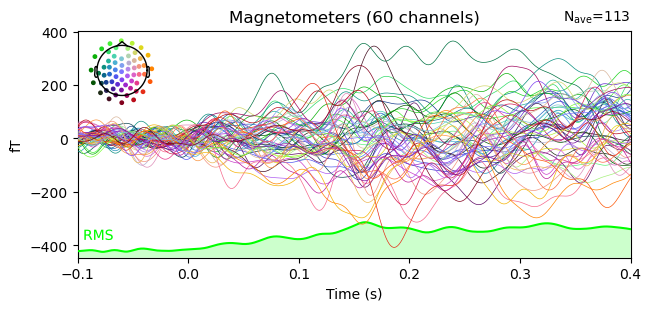

In [7]:
evoked_left.plot(gfp=True);

Here, note the large positive and negative event-related fields at respectively t = 0.170 s and t = 0.187 s

## Plotting the event-related fields arranged topographically according to senors locations

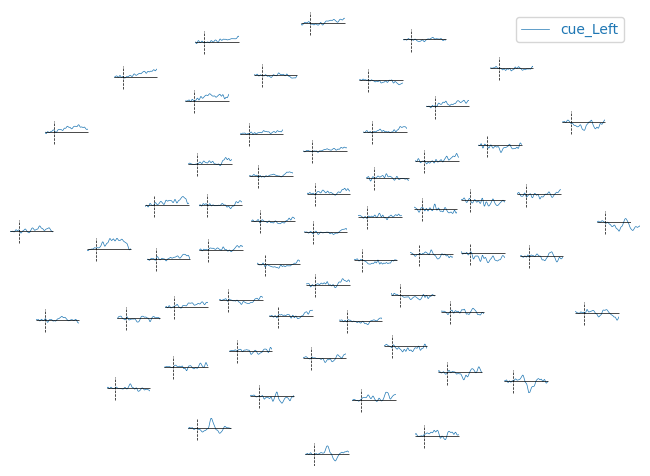

In [8]:
%matplotlib inline
evoked_left.plot_topo();

To enable interactive plotting, use %matplotlib qt instead of %matplotlib inline. This allows you to click on individual sensor plots to enlarge and inspect them in more detail.

## To plot a topographic map of the response at any specific instant of time write:

Since the Cerca/Quspin system uses triaxial sensors that measure the magnetic field along three mutually orthogonal directions, it is important to identify and separate the components corresponding to each direction and plot them individually.

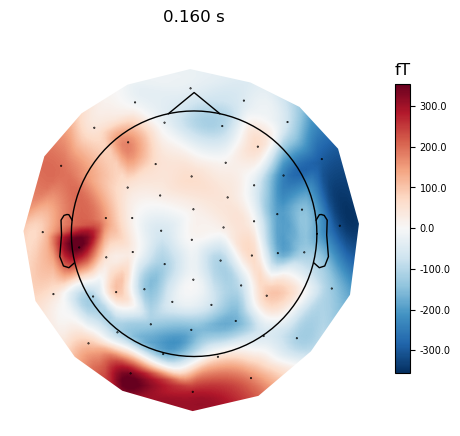

In [9]:
evoked_left.plot_topomap(times=[0.160],
    contours = 0,
    ch_type='mag',
    size=3,
    show_names=False,
    extrapolate = 'local',
    outlines = 'head'
);


**Question 1**: Explain how an equivalent current dipole (ECD) can account for the posterior event-related field by drawing the ECD on top of the topographic plot (hint: consider the 'right-hand rule')

#### Now plot the topographic maps across multiple time points

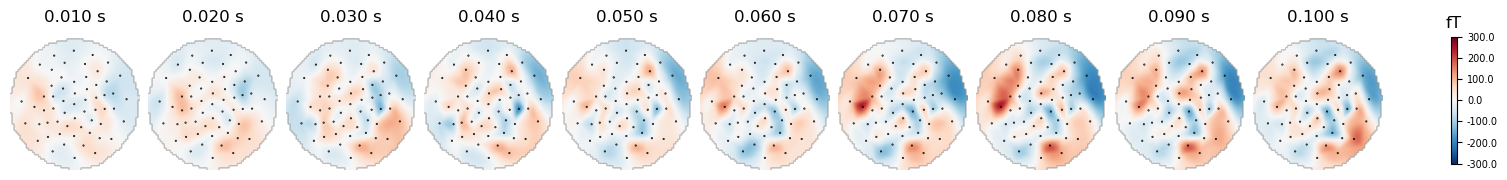

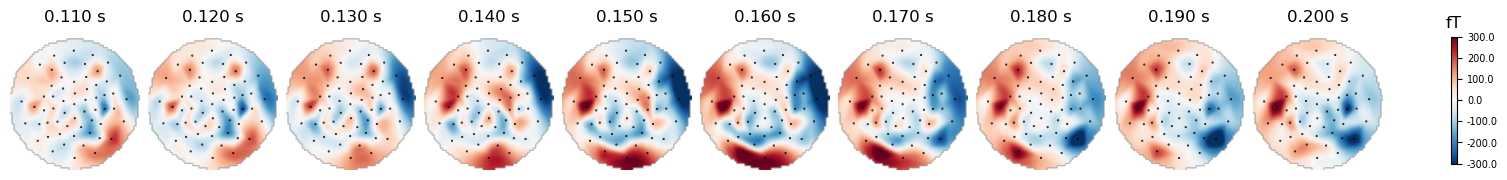

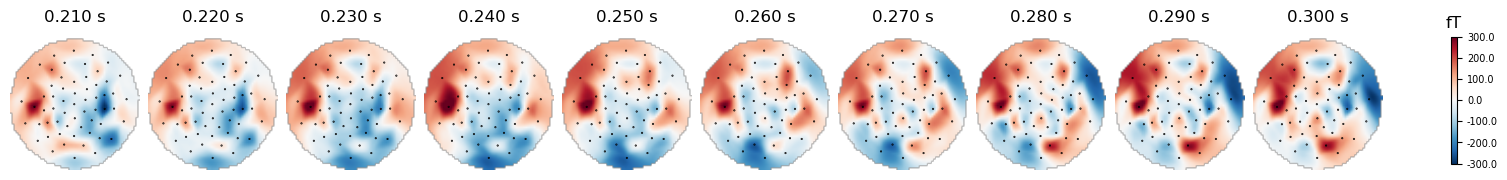

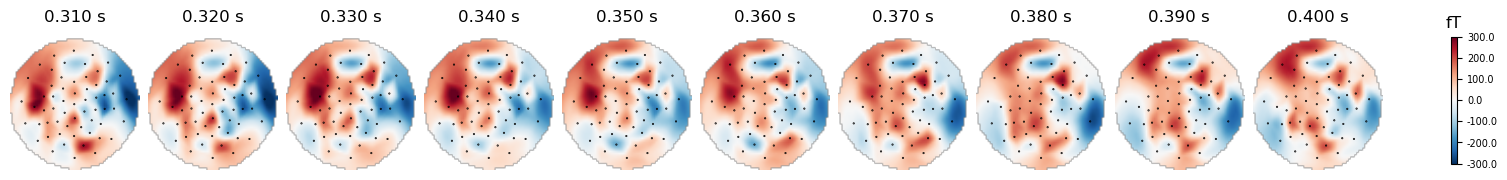

In [10]:
time_ins1 = np.linspace(0.01, 0.1, num=10) #define time points
time_ins2 = np.linspace(0.11, 0.2, num=10) #define time points
time_ins3 = np.linspace(0.21, 0.3, num=10) #define time points
time_ins4 = np.linspace(0.31, 0.4, num=10) #define time points
evoked_left.plot_topomap(times=time_ins1, ch_type='mag', extrapolate = 'local', contours = 0, outlines = None,vlim = (-300,300));
evoked_left.plot_topomap(times=time_ins2, ch_type='mag', extrapolate = 'local', contours = 0, outlines = None,vlim = (-300,300));
evoked_left.plot_topomap(times=time_ins3, ch_type='mag', extrapolate = 'local', contours = 0, outlines = None,vlim = (-300,300));
evoked_left.plot_topomap(times=time_ins4, ch_type='mag', extrapolate = 'local', contours = 0, outlines = None,vlim = (-300,300));


## Preregistration and publications

Publication, example:

"Before calculating the event-related fields, the data were bandpass filtered at 0.1-30 Hz (non-causal finite impulse response filter implemented using a Hamming window and a 441 sample filter length). After averaging, a 100 ms baseline was subtracted."



## References
Woodman, G. F. (2010). A brief introduction to the use of event-related potentials in studies of perception and attention. *Attention, Perception, & Psychophysics*, *72*(8), 2031–2046. https://doi.org/10.3758/APP.72.8.2031

Luck, S. J. (2014). *An Introduction to the Event-Related Potential Technique* (2nd ed.). Bradford Books.


(many of the recommendation for calculated event-related potentials also apply to calculating event-related fields)
